<a href="https://colab.research.google.com/github/the-sara/computer_vision_journye/blob/main/canny_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#canny edge detector algo:

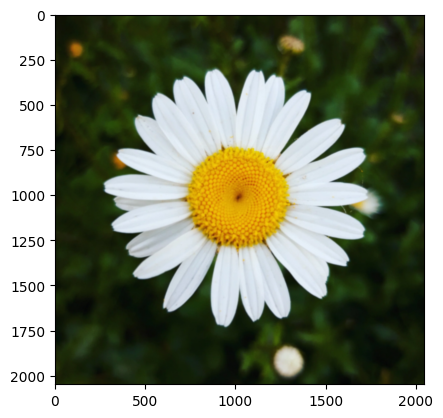

In [8]:
#A:
#1) removing the noise using gaussian filter
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image,ImageFilter
img=Image.open("daisy.webp")
blured=img.filter(ImageFilter.GaussianBlur())
plt.imshow(blured)

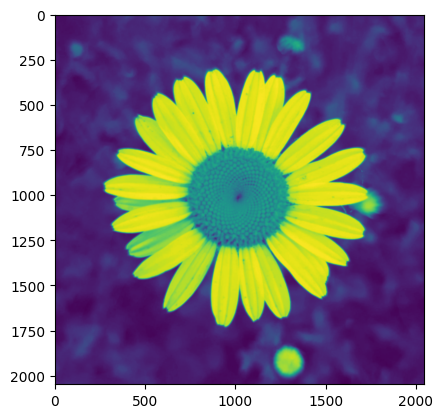

In [9]:
# transforming to grey scale:
img_arr = np.array(blured)
blured_g = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
plt.imshow(blured_g)

In [10]:
#2) calculating the gradient
sobelx=cv2.Sobel(blured_g,cv2.CV_64F,1,0)
sobely=cv2.Sobel(blured_g,cv2.CV_64F,0,1)

In [11]:
mag=np.sqrt(sobelx**2+ sobely**2)
angle=np.arctan(sobelx,sobely)*(180/np.pi)
angle[angle>0]+=180

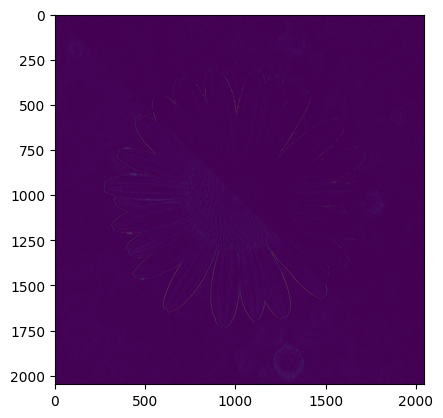

In [12]:
#3)the non maximum supression
def nms(magnitude,ang):
  N,M=magnitude.shape
  outp=np.zeros((N,M))
  #loop throgh all the pixels:
  for y in range(1,N-1):
    for x in range(1,M-1):
      if ang[y,x]>0 and ang[y,x]<=22.5 :n1,n2=magnitude[y,x+1],magnitude[y,x-1]
      elif ang[y,x]>22.5 and ang[y,x]<=67.5:n1,n2=magnitude[y+1,x-1],magnitude[y-1,x+1]
      elif ang[y,x]>67.5 and ang[y,x]<=112.5 :n1,n2=magnitude[y+1,x],magnitude[y-1,x]
      elif ang[y,x]>112.5 and ang[y,x]<=157.5 :n1,n2=magnitude[y-1,x-1],magnitude[y+1,x+1]
      else : n1,n2=magnitude[y,x+1],magnitude[y,x-1]
      if magnitude[y,x]>=n1 and magnitude[y,x]>=n2:outp[y,x]=magnitude[y,x]
      else: outp[x,y]=0
  return outp

nms_img=nms(mag,angle)
plt.imshow(nms_img)

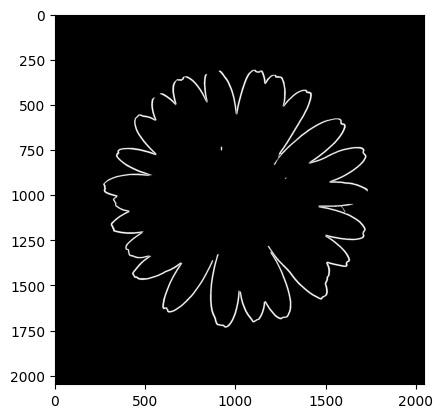

In [13]:
#4) hesterisis thresholding:
def hesterisis_threshold(img):
   N,M=mag.shape
   outp=np.zeros((N,M))
   weak=75
   strong=255
   min=75
   max=150
   #loop throgh all the pixels:
   for y in range(1,N-1):
    for x in range(1,M-1):
      intensity=mag[y,x]
      if intensity>=max:outp[y,x]=strong
      elif intensity<max and intensity>=min :outp[y,x]=weak
      else: outp[y,x]=0
   #simple conectivity check
   for y in range(1,N-1):
      for x in range(1,M-1):
        if outp[y,x]==weak:
          neighbors=outp[y-2:y+2,x-2:x+2]
          if np.any(neighbors==strong):outp[y,x]=strong
          else:outp[y,x]=0
   return outp

edges=hesterisis_threshold(nms_img)
plt.imshow(edges,cmap="grey")


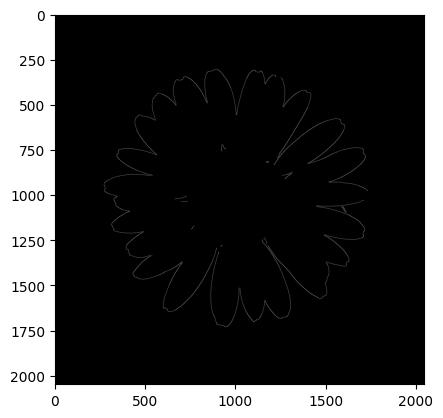

In [ ]:
# comparision with the opencv built in canny
real_edges=cv2.Canny(blured_g,75,150)
plt.imshow(real_edges,cmap='grey')